In [1]:
# data processing packages
import numpy as np   
import pandas as pd 
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
%matplotlib inline    
import matplotlib as mplt
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import IPython
from IPython.display import display

import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
# matplotlib.style.use('ggplot')
import itertools

import pickle
import seaborn as sns

import random

# local packages 
# from utils_causal import *
from utils_results_analysis import *

Using TensorFlow backend.


In [2]:
def plot_epoch_variable(file_path, legend_label, x_right, ax_prior, ax_poster, legend_size, legend_col, data_idx ):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)

    # fig, ax = plt.subplots( ncols = 2 , figsize=(22,6));
    
    # --- prior
    if ax_prior:
        
        att = []
        for i in data:
            att.append(i[1])
    
        for i in range(len(att[0])):
            
            tmpdata = [ j[i] for j in att ]
            ax_prior.plot(tmpdata, label = legend_label[i] );
            ax_prior.set_xlim([0,x_right])
        
        ax_prior.tick_params(axis = 'both', which = 'major', labelsize = 13)
        ax_prior.legend(fontsize=legend_size, ncol = legend_col)
        
    # --- posterior
    if ax_poster:
        
        att = []
        for i in data:
            att.append(i[data_idx])
    
        for i in range(len(att[0])):
            tmpdata = [ j[i] for j in att ]
            ax_poster.plot(tmpdata, label = legend_label[i] );
            ax_poster.set_xlim([0,x_right])
            
            ax_poster.set_xlabel('Epoch', fontweight = 'bold', fontsize = 13)
            ax_poster.set_ylabel('Variable importance', fontweight = 'bold', fontsize = 13)
            
        ax_poster.tick_params(axis = 'both', which = 'major', labelsize = 13)
        ax_poster.legend(fontsize=legend_size, ncol = legend_col)
        

def plot_epoch_variable_temporal(file_path, epoch_id, ax, variable_names, bool_show_ylabel):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)
    
    epoch_var_att = []
    for i in data:
        epoch_var_att.append(i[0])
    
    print(np.shape(epoch_var_att))

#     fig, ax = plt.subplots();
    ax_sns = sns.heatmap(epoch_var_att[epoch_id], linewidth=0.5, ax = ax)
    
    time_steps = range(1, len(epoch_var_att[epoch_id][0])+1)[::-1]
    
#     time_steps = time_steps[::-1]
    ax_sns.set_xticklabels(time_steps)
    
    if bool_show_ylabel == True:
        ax_sns.set_yticklabels(variable_names, rotation = 360)
    else:
        ax_sns.set_yticklabels([])
#         xticklabels=True, yticklabels=True)
    
    ax.set_xlabel('Time step lag', fontweight = 'bold', fontsize = 13)
    ax.set_title('Epoch ' + str(epoch_id),  {'fontsize': 13, 'fontweight' : 'bold'})
    
   
    
    
def sort_variable(file_path, label, data_idx):
    
    pkl_file = open(file_path, 'rb')
    data = pickle.load(pkl_file)
    
    att = []
    for i in data:
        att.append(i[data_idx])
        
    print(np.shape((att)))
    
    # last epoch 
    label_val = [[label[idx], val] for idx, val in enumerate(att[-1])]    
    
    
    return sorted(label_val, key = lambda x:x[1]), label_val

def generate_color(num):
    
    cnt = int( num**(1/4.0) + 1)
    color = []
    
    for r in range(cnt):
        for g in range(cnt):
            for b in range(cnt):
                
                for a in range(cnt):
                    
                    color.append( [0.0 + 1.0/cnt*r, 0.0 + 1.0/cnt*g, 0.0 + 1.0/cnt*b, 0.0 + 1.0/cnt*a] )
                    print(cnt, num,len(color))
                    
                    if len(color) == num:
                        break
                        
                if len(color) == num:
                        break
                        
            if len(color) == num:
                break
        
        if len(color) == num:
            break
        
    return color   

In [3]:
# ---- PLANT dataset ----

target_col = ['Auto-regressive']
feature_cols = ['Irradiance', 'P-temperature', 'Cloud-cover', 'Dew-point', 'Humidity', 'Pressure',\
                'Temperature', 'Wind-bearing', 'Wind-speed']

full_cols =  feature_cols + target_col


 ----  01.01e-05
(100, 10)
[['Irradiance', 0.07512868], ['P-temperature', 0.09570822], ['Cloud-cover', 0.18608311], ['Dew-point', 0.070707105], ['Humidity', 0.0797895], ['Pressure', 0.09258047], ['Temperature', 0.14256677], ['Wind-bearing', 0.08361171], ['Wind-speed', 0.08679404], ['Auto-regressive', 0.08703038]] 

(100, 10)
[['Irradiance', 0.113167025], ['P-temperature', 0.093048416], ['Cloud-cover', 0.096058086], ['Dew-point', 0.075986676], ['Humidity', 0.09392244], ['Pressure', 0.075810544], ['Temperature', 0.07620097], ['Wind-bearing', 0.19255784], ['Wind-speed', 0.07579569], ['Auto-regressive', 0.10745232]] 


 ----  01.00.0001
(100, 10)
[['Irradiance', 0.084186934], ['P-temperature', 0.19056593], ['Cloud-cover', 0.071086094], ['Dew-point', 0.0709681], ['Humidity', 0.0938705], ['Pressure', 0.09877147], ['Temperature', 0.13716583], ['Wind-bearing', 0.08537805], ['Wind-speed', 0.080239125], ['Auto-regressive', 0.08776794]] 

(100, 10)
[['Irradiance', 0.09320039], ['P-temperature', 

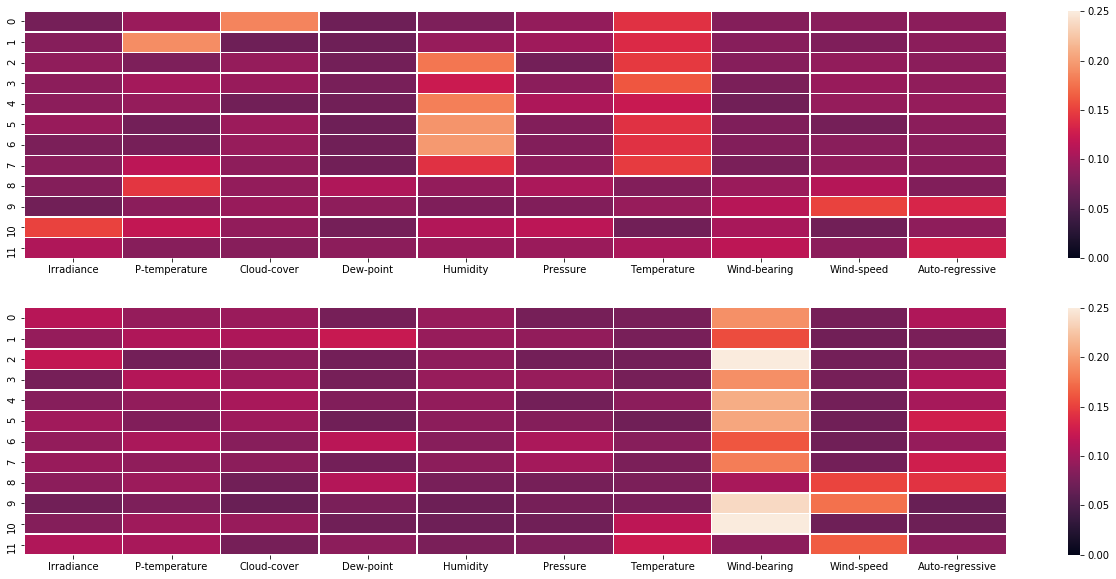

In [11]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 


# "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 
#             "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
#             "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
#             "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            ]  


# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
    print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_softmax/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    print(label_impt, '\n')
    
    file_path = "../../ts_results/impt_softmax/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    print(label_impt, '\n')


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.25);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1], vmin=0, vmax=0.25);
ax_sns.set_xticklabels(full_cols);



 ----  01.01e-05
(100, 10)
[['Irradiance', 0.045433253], ['P-temperature', 0.046241503], ['Cloud-cover', 0.04591477], ['Dew-point', 0.31258896], ['Humidity', 0.046589315], ['Pressure', 0.0521063], ['Temperature', 0.047114156], ['Wind-bearing', 0.31361848], ['Wind-speed', 0.044046808], ['Auto-regressive', 0.04634638]] 

(100, 10)
[['Irradiance', 0.24241832], ['P-temperature', 0.24282657], ['Cloud-cover', 0.035893105], ['Dew-point', 0.03504975], ['Humidity', 0.052951332], ['Pressure', 0.034930356], ['Temperature', 0.039071247], ['Wind-bearing', 0.24294703], ['Wind-speed', 0.036260515], ['Auto-regressive', 0.037651815]] 


 ----  01.00.0001
(100, 10)
[['Irradiance', 0.05572694], ['P-temperature', 0.06173826], ['Cloud-cover', 0.08318904], ['Dew-point', 0.13875805], ['Humidity', 0.056153152], ['Pressure', 0.05645381], ['Temperature', 0.05575045], ['Wind-bearing', 0.371732], ['Wind-speed', 0.06536631], ['Auto-regressive', 0.055132054]] 

(100, 10)
[['Irradiance', 0.24317025], ['P-temperatur

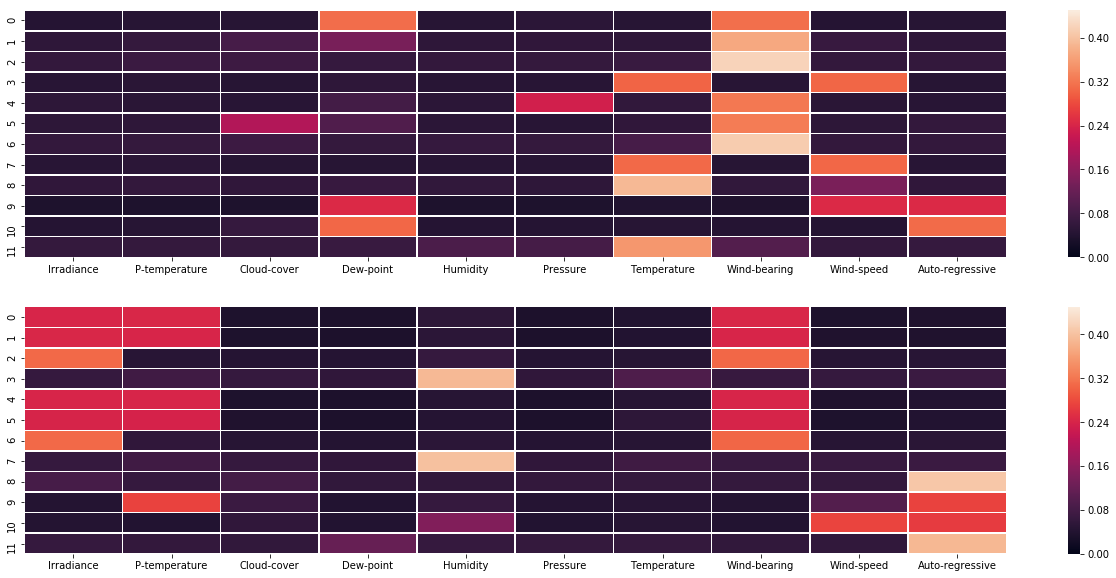

In [8]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 


# "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 
#             "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
#             "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
#             "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            ]  


# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
    print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_exp/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    print(label_impt, '\n')
    
    file_path = "../../ts_results/impt_exp/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    print(label_impt, '\n')


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.45);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1], vmin=0, vmax=0.45);
ax_sns.set_xticklabels(full_cols);



 ----  01.01e-05
(100, 10)
[['Irradiance', 0.15400848], ['P-temperature', 0.06487651], ['Cloud-cover', 0.049032945], ['Dew-point', 0.055155843], ['Humidity', 0.104722925], ['Pressure', 0.037768178], ['Temperature', 0.2389473], ['Wind-bearing', 0.22099613], ['Wind-speed', 0.039243225], ['Auto-regressive', 0.035248496]] 

(100, 10)
[['Irradiance', 0.36832106], ['P-temperature', 0.052576393], ['Cloud-cover', 0.17970541], ['Dew-point', 0.05583321], ['Humidity', 0.05166144], ['Pressure', 0.07542921], ['Temperature', 0.05312654], ['Wind-bearing', 0.054783635], ['Wind-speed', 0.0560431], ['Auto-regressive', 0.05251996]] 


 ----  01.00.0001
(100, 10)
[['Irradiance', 0.050828334], ['P-temperature', 0.04909918], ['Cloud-cover', 0.045827415], ['Dew-point', 0.058016025], ['Humidity', 0.057165097], ['Pressure', 0.048217546], ['Temperature', 0.2960238], ['Wind-bearing', 0.28834277], ['Wind-speed', 0.05161924], ['Auto-regressive', 0.054860666]] 

(100, 10)
[['Irradiance', 0.29908955], ['P-temperatu

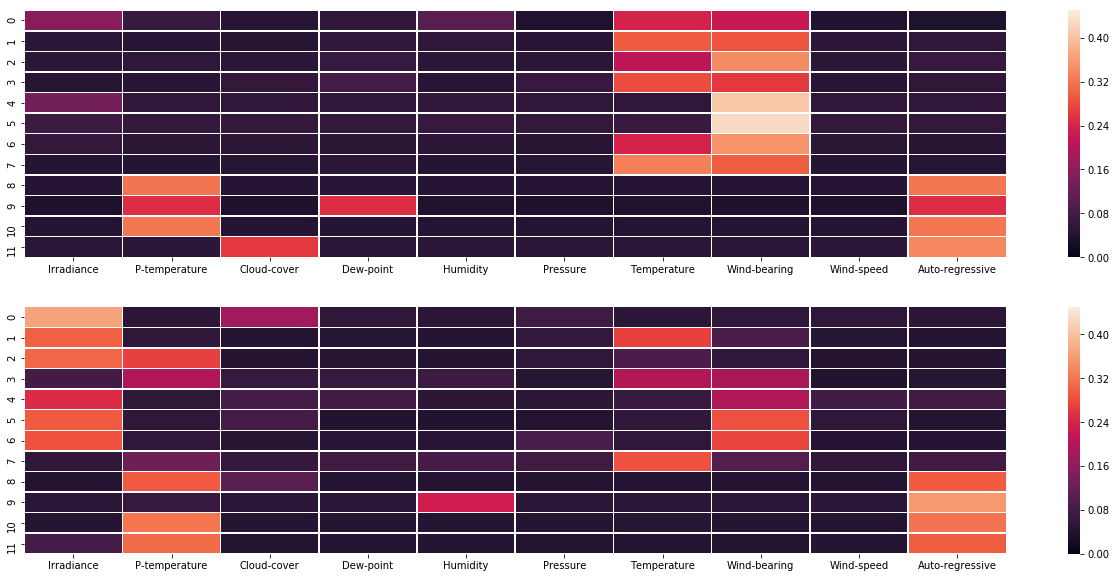

In [6]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 


# "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 
#             "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
#             "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
#             "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            ]  


# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
    print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_gaussian_clip/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    print(label_impt, '\n')
    
    file_path = "../../ts_results/impt_gaussian_clip/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    print(label_impt, '\n')


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.45);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1], vmin=0, vmax=0.45);
ax_sns.set_xticklabels(full_cols);



 ----  01.01e-05
(100, 10)
[['Irradiance', 0.06290156], ['P-temperature', 0.056509964], ['Cloud-cover', 0.39866683], ['Dew-point', 0.05993991], ['Humidity', 0.069495864], ['Pressure', 0.06306848], ['Temperature', 0.10535165], ['Wind-bearing', 0.068399124], ['Wind-speed', 0.05857014], ['Auto-regressive', 0.057096444]] 

(100, 10)
[['Irradiance', 0.19967173], ['P-temperature', 0.03135145], ['Cloud-cover', 0.033241693], ['Dew-point', 0.18634066], ['Humidity', 0.03167043], ['Pressure', 0.19661997], ['Temperature', 0.029129576], ['Wind-bearing', 0.19976927], ['Wind-speed', 0.05970606], ['Auto-regressive', 0.032499127]] 


 ----  01.00.0001
(100, 10)
[['Irradiance', 0.049071528], ['P-temperature', 0.0479806], ['Cloud-cover', 0.3380675], ['Dew-point', 0.05227067], ['Humidity', 0.047722623], ['Pressure', 0.04781696], ['Temperature', 0.20758557], ['Wind-bearing', 0.04938392], ['Wind-speed', 0.04848999], ['Auto-regressive', 0.11161065]] 

(100, 10)
[['Irradiance', 0.21669345], ['P-temperature',

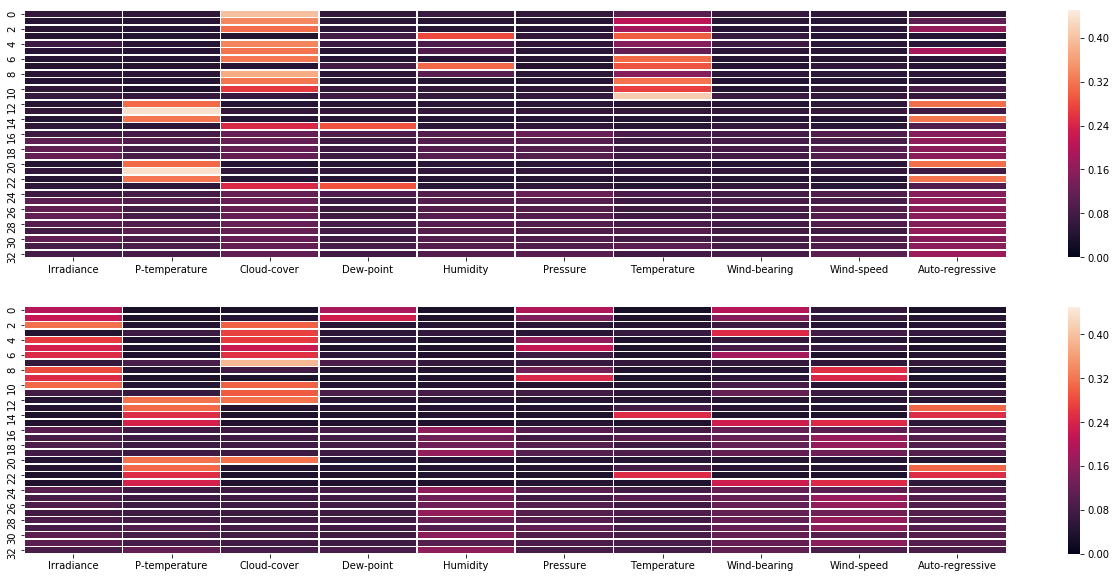

In [47]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 


# "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 
#             "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
#             "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
#             "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
            "00.51e-05", "00.50.0001", "00.50.001", "00.50.01", 
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            "10.81e-05", "10.80.0001", "10.80.001", "10.80.01",
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
            "10.51e-05", "10.50.0001", "10.50.001", "10.50.01", "10.50.1"
            ]  


# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
    print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    print(label_impt, '\n')
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    print(label_impt, '\n')


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.45);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1], vmin=0, vmax=0.45);
ax_sns.set_xticklabels(full_cols);



 ----  01.01e-05
[['Irradiance', 0.044562384], ['P-temperature', 0.044942494], ['Cloud-cover', 0.31277764], ['Dew-point', 0.0446563], ['Humidity', 0.044784058], ['Pressure', 0.044681367], ['Temperature', 0.32934758], ['Wind-bearing', 0.044782043], ['Wind-speed', 0.0447471], ['Auto-regressive', 0.044718973]]
[['Irradiance', 0.07053039], ['P-temperature', 0.098612815], ['Cloud-cover', 0.058898207], ['Dew-point', 0.15240309], ['Humidity', 0.109007776], ['Pressure', 0.045164466], ['Temperature', 0.18020158], ['Wind-bearing', 0.081698775], ['Wind-speed', 0.10054181], ['Auto-regressive', 0.10294116]]

 ----  01.00.0001
[['Irradiance', 0.044851843], ['P-temperature', 0.04524819], ['Cloud-cover', 0.32850578], ['Dew-point', 0.045141153], ['Humidity', 0.044775322], ['Pressure', 0.044779655], ['Temperature', 0.31191447], ['Wind-bearing', 0.044955045], ['Wind-speed', 0.044978816], ['Auto-regressive', 0.044849683]]
[['Irradiance', 0.07053039], ['P-temperature', 0.098612815], ['Cloud-cover', 0.0588

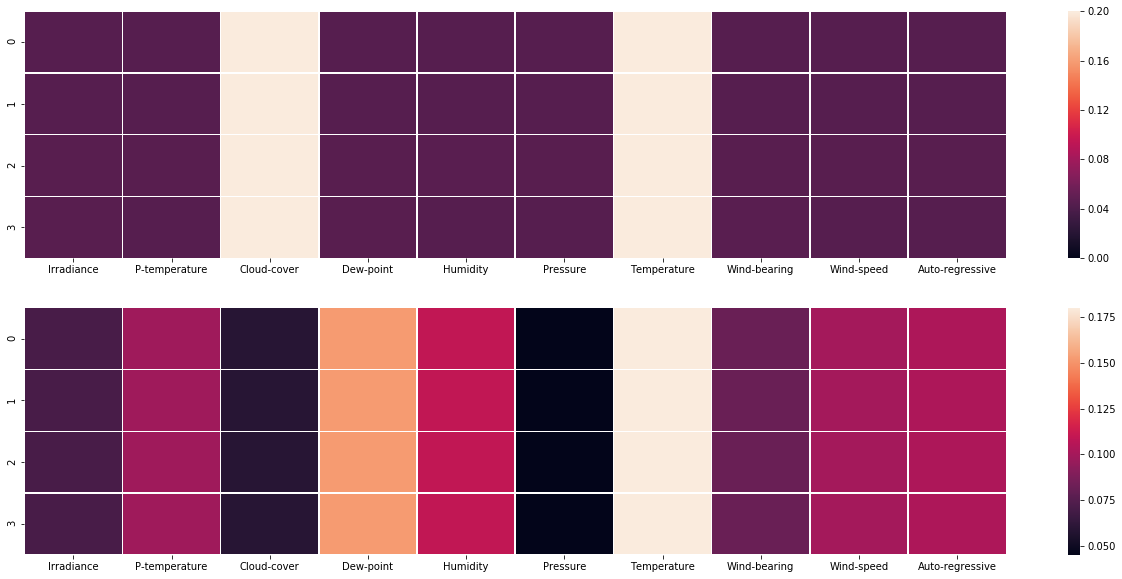

In [20]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 

# "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
#             "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
#             "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01",
#             "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
#             "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
#             "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"
            ]

# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
    print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_sigmoid_pos/ke_mv_full_plant_" + tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    print(label_impt)
    
    file_path = "../../ts_results/impt_sigmoid_pos/ke_mv_tensor_plant_" + tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    print(label_impt)


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0], vmin=0, vmax=0.2);
ax_sns.set_xticklabels(full_cols);

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1]);
ax_sns.set_xticklabels(full_cols);


[Text(0.5,0,'Irradiance'),
 Text(1.5,0,'P-temperature'),
 Text(2.5,0,'Cloud-cover'),
 Text(3.5,0,'Dew-point'),
 Text(4.5,0,'Humidity'),
 Text(5.5,0,'Pressure'),
 Text(6.5,0,'Temperature'),
 Text(7.5,0,'Wind-bearing'),
 Text(8.5,0,'Wind-speed'),
 Text(9.5,0,'Auto-regressive')]

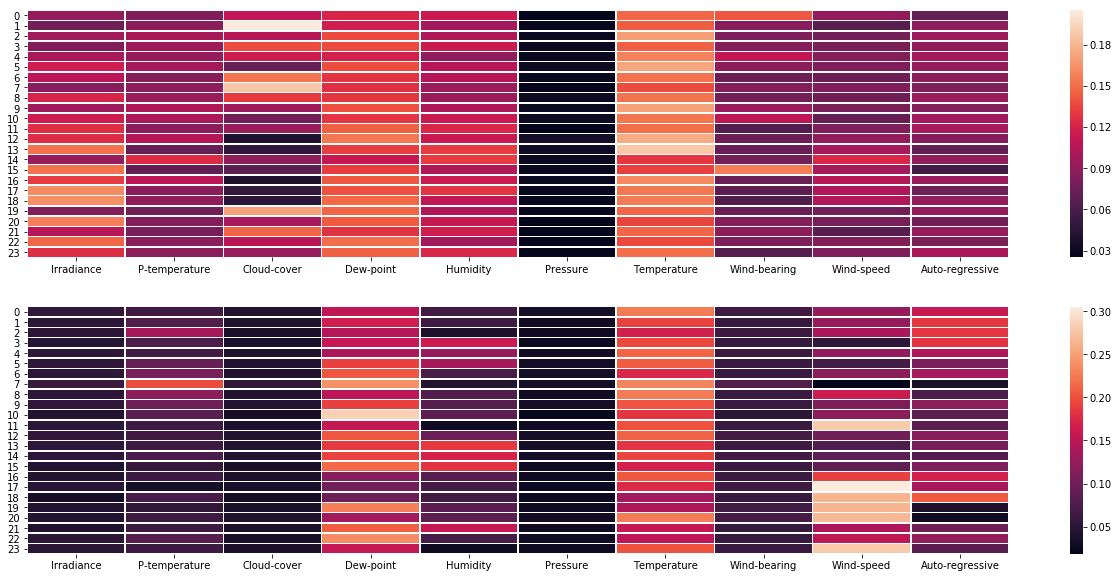

In [8]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
            "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
            "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"]  


# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
#     print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_sigmoid_neg/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    
    
    file_path = "../../ts_results/impt_sigmoid_neg/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0])
ax_sns.set_xticklabels(full_cols)

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1])
ax_sns.set_xticklabels(full_cols)


[Text(0.5,0,'Irradiance'),
 Text(1.5,0,'P-temperature'),
 Text(2.5,0,'Cloud-cover'),
 Text(3.5,0,'Dew-point'),
 Text(4.5,0,'Humidity'),
 Text(5.5,0,'Pressure'),
 Text(6.5,0,'Temperature'),
 Text(7.5,0,'Wind-bearing'),
 Text(8.5,0,'Wind-speed'),
 Text(9.5,0,'Auto-regressive')]

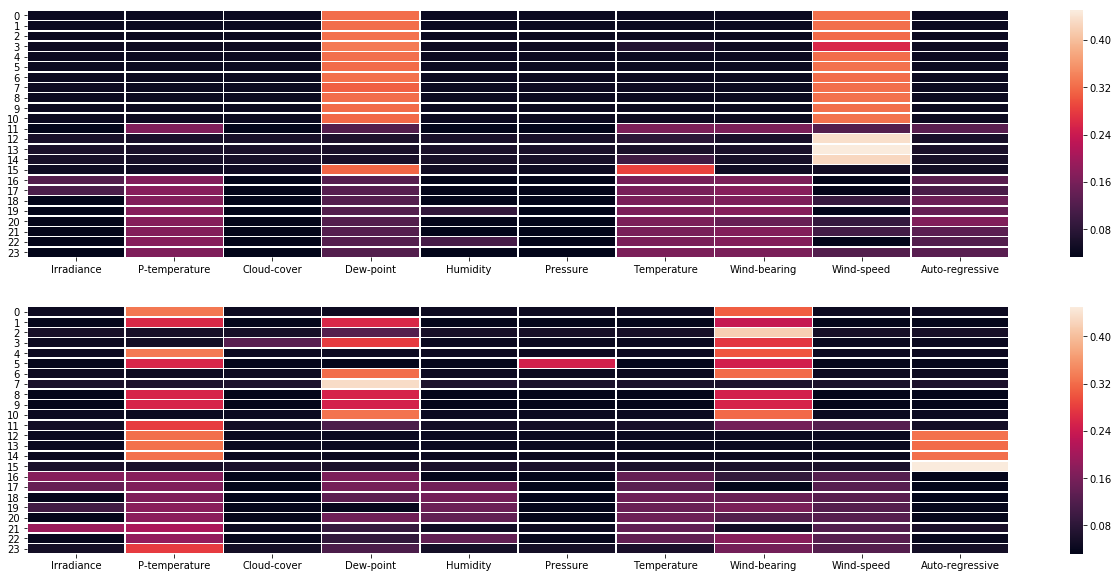

In [52]:

# learned importance
data_idx = 3

# "01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
#             "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
#             "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01", 
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01", 
            "00.51e-05", "00.50.0001", "00.50.001", "10.50.01", 
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",
            "10.81e-05", "10.80.0001", "10.80.001", "10.80.01", 
            "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"]  


# --- variable impor

impt_list_full = []
impt_list_tensor = []

for tmp_idx in file_idx:
    
#     print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_full_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_full.append([j[1] for j in label_impt])
    
    
    file_path = "../../ts_results/impt_gaussian/ke_mv_tensor_plant_"+ tmp_idx + "_.p"
    sorted_list, label_impt = sort_variable(file_path, full_cols, data_idx) 
    impt_list_tensor.append([j[1] for j in label_impt])
    


fig, ax = plt.subplots(2, figsize=(22,10));

ax_sns = sns.heatmap(impt_list_full, linewidth = 0.5, ax = ax[0])
ax_sns.set_xticklabels(full_cols)

ax_sns = sns.heatmap(impt_list_tensor, linewidth = 0.5, ax = ax[1])
ax_sns.set_xticklabels(full_cols)



 [['Pressure', 0.031294074], ['Cloud-cover', 0.04106587], ['Irradiance', 0.050960705], ['P-temperature', 0.062352784], ['Wind-bearing', 0.06418861], ['Wind-speed', 0.094660066], ['Auto-regressive', 0.11708099], ['Humidity', 0.1602427], ['Temperature', 0.1697076], ['Dew-point', 0.20844655]]


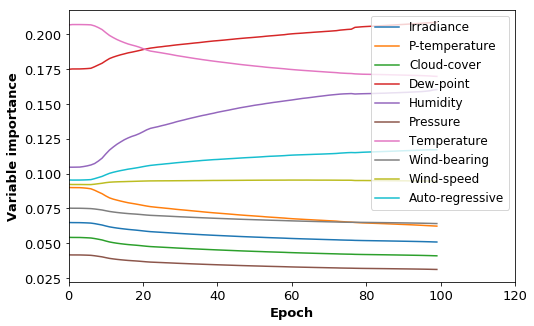

In [13]:
# gate type: tensor

file_path = "../../ts_results/llk_var_sigmoid/ke_mv_tensor_plant_11.00.01_.p"

# learned importance
data_idx = 3

# --- variable impor

print('\n', sort_variable(file_path, full_cols, data_idx))

# --- visualization

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12, 1, data_idx)



 [['P-temperature', 0.07058151], ['Pressure', 0.07058341], ['Dew-point', 0.070742846], ['Humidity', 0.070956804], ['Auto-regressive', 0.071036875], ['Wind-speed', 0.08235668], ['Wind-bearing', 0.11666336], ['Temperature', 0.1336922], ['Irradiance', 0.1399276], ['Cloud-cover', 0.17345873]]


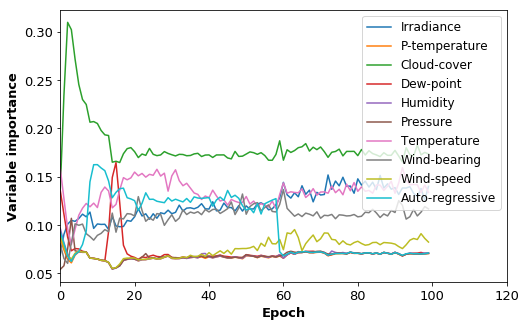

In [89]:
# gate type: full

file_path = "../../ts_results/llk_var_learn/ke_mv_full_plant_11.00.0001_.p"

# learned importance
data_idx = 3

# --- variable impor

print('\n', sort_variable(file_path, full_cols, data_idx))

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12, 1, data_idx)



 [['Dew-point', 0.034856033], ['Irradiance', 0.04971486], ['Wind-speed', 0.05331886], ['Wind-bearing', 0.054463733], ['Temperature', 0.063372], ['Auto-regressive', 0.07273421], ['Pressure', 0.073946916], ['P-temperature', 0.08248703], ['Humidity', 0.25755316], ['Cloud-cover', 0.2575532]]


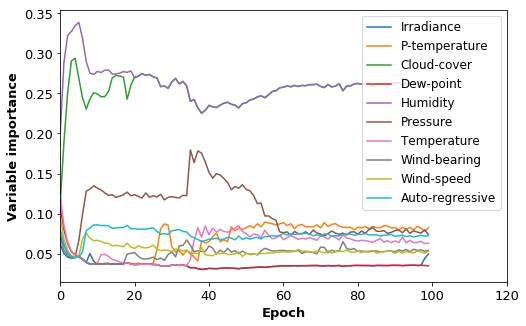

In [88]:
# gate type: tensor

file_path = "../../ts_results/llk_var_learn/ke_mv_tensor_plant_10.80.0001_.p"

# learned importance
data_idx = 3

# --- variable impor

print('\n', sort_variable(file_path, full_cols, data_idx))

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12, 1, data_idx)

# fig.savefig('../../ts_results/figure/fullvar_plant.eps', bbox_inches='tight')


# # --- epoch-wise variable temporal importance

# fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

# plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

# plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

# fig.subplots_adjust(wspace=0.03, hspace=0)

# # fig.savefig('../../ts_results/figure/fullvar_temp_plant.eps', bbox_inches='tight')



 [['Auto-regressive', 0.030895663], ['P-temperature', 0.043909602], ['Wind-speed', 0.04567817], ['Dew-point', 0.057760656], ['Pressure', 0.07180093], ['Humidity', 0.10257726], ['Temperature', 0.11402116], ['Wind-bearing', 0.12046497], ['Irradiance', 0.14595525], ['Cloud-cover', 0.26693627]]
(100, 10, 19)
(100, 10, 19)


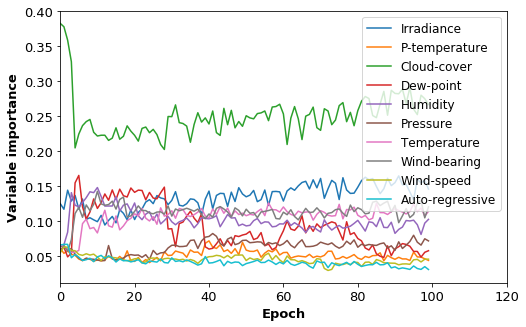

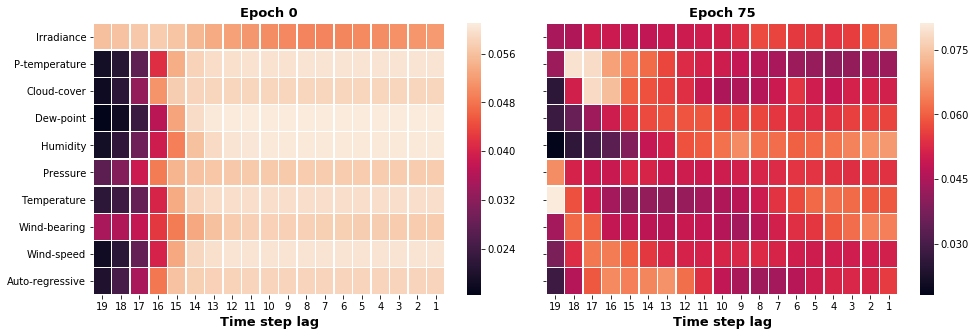

In [64]:
# gate type: full

file_path = "../../ts_results/llk_var_learn/ke_mv_full_plant_11.00.01_.p"

# --- variable impor

print('\n', sort_variable(file_path, full_cols))

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12, 1, 2)

# fig.savefig('../../ts_results/figure/fullvar_plant.eps', bbox_inches='tight')


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

fig.subplots_adjust(wspace=0.03, hspace=0)

# fig.savefig('../../ts_results/figure/fullvar_temp_plant.eps', bbox_inches='tight')



 [['Temperature', 0.028767787], ['Pressure', 0.03952358], ['Dew-point', 0.04633625], ['Humidity', 0.069384634], ['Wind-bearing', 0.10501732], ['P-temperature', 0.10621091], ['Auto-regressive', 0.10895034], ['Cloud-cover', 0.15882397], ['Wind-speed', 0.1670008], ['Irradiance', 0.1699845]]
(100, 10, 19)
(100, 10, 19)


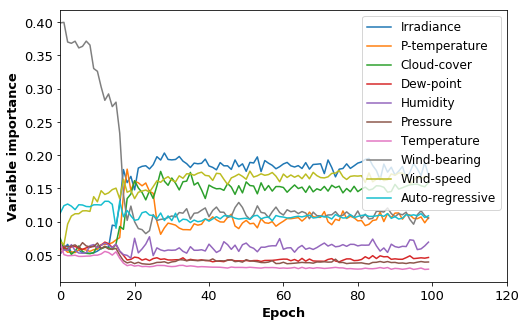

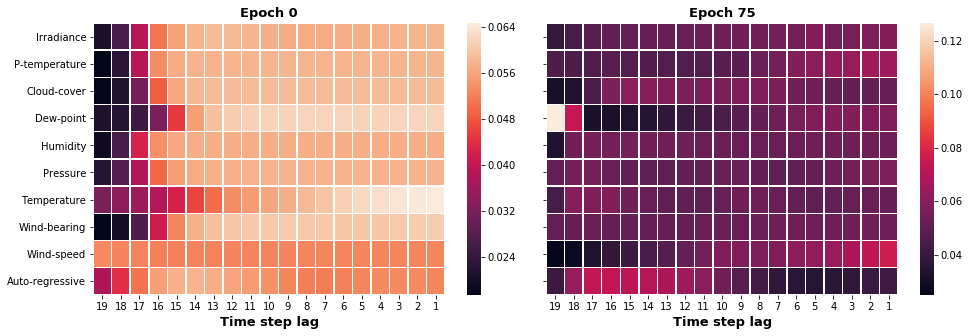

In [24]:
# gate type: tensor

# file_path = "../../ts_results/plant/tensor/ke_tensorplant_01.00.1_.p"

file_path = "../../ts_results/llk/ke_mv_tensor_plant_00.80.0001_.p"


# --- variable impor

print('\n', sort_variable(file_path, full_cols))

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12, 1)

# fig.savefig('../../ts_results/figure/tensor_var_plant.eps', bbox_inches='tight')


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

fig.subplots_adjust(wspace=0.03, hspace=0)

# fig.savefig('../../ts_results/figure/tensor_var_temp_plant.eps', bbox_inches='tight')



 [['Wind-bearing', 0.040869683], ['Auto-regressive', 0.04474839], ['P-temperature', 0.059897225], ['Pressure', 0.066149905], ['Temperature', 0.108656876], ['Irradiance', 0.11450865], ['Humidity', 0.12053426], ['Dew-point', 0.1414387], ['Wind-speed', 0.14578296], ['Cloud-cover', 0.15741342]]
(80, 10, 19)
(80, 10, 19)


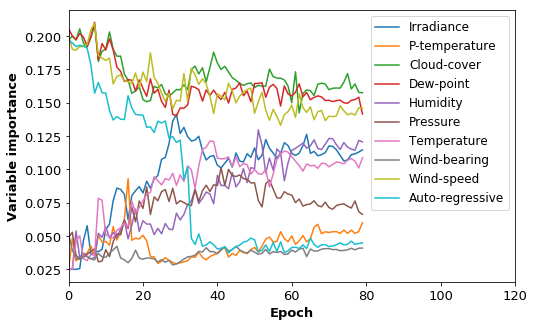

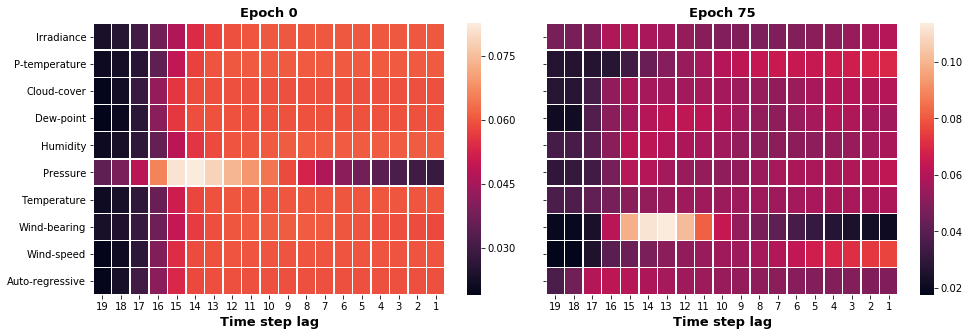

In [12]:
# gate type: full

file_path = "../../ts_results/plant/full/ke_plant_01.00.1_.p"

# --- variable impor

print('\n', sort_variable(file_path, full_cols))

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12)


# fig.savefig('../../ts_results/figure/full_var_plant.eps', bbox_inches='tight')


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

fig.subplots_adjust(wspace=0.03, hspace=0)

# fig.savefig('../../ts_results/figure/full_var_temp_plant.eps', bbox_inches='tight')


('\n', [['Dew-point', 0.034108493], ['Temperature', 0.041016363], ['Cloud-cover', 0.07639352], ['Irradiance', 0.08453229], ['Humidity', 0.09652364], ['Pressure', 0.10533282], ['Wind-speed', 0.115569875], ['P-temperature', 0.12627581], ['Auto-regressive', 0.15163974], ['Wind-bearing', 0.16860741]])
(80, 10, 19)
(80, 10, 19)


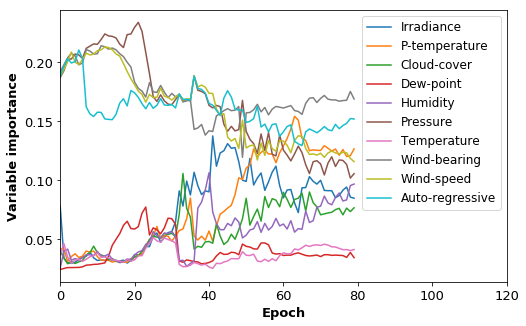

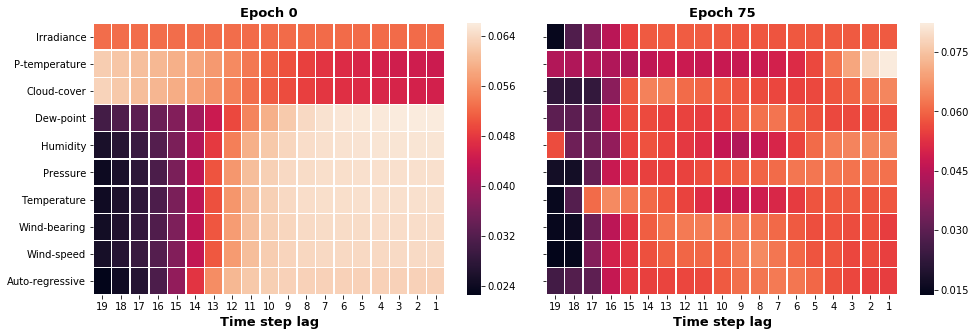

In [7]:
# gate type: tensor

file_path = "../../ts_results/plant/tensor/ke_plant_01.00.1_.p"

# --- variable impor

print('\n', sort_variable(file_path, full_cols))

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 12)

# fig.savefig('../../ts_results/figure/tensor_var_plant.eps', bbox_inches='tight')


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 75, ax[1], full_cols, False)

fig.subplots_adjust(wspace=0.03, hspace=0)

# fig.savefig('../../ts_results/figure/tensor_var_temp_plant.eps', bbox_inches='tight')


In [22]:
# ---- SML dataset ----

full_cols = ['Temp. dinning',
          'Forecast temp.', 
          'CO2 dinning', 
          'CO2 room', 
          'Humid. dinning', 
          'Humid. room', 
          'Lighting dinning', 
          'Lighting room', 
          'Sun dusk',
          'Wind', 
          'Sunlight in west', 
          'Sunlight in east', 
          'Sunlight in south', 
          'Sun irradiance', 
          'Outdoor temp.',
          'Outdoor humidity',
          'Auto-regressive']

In [23]:
# gate type: full

# learned importance
data_idx = 3

file_idx = ["01.01e-05", "01.00.0001", "01.00.001", "01.00.01",\
            "00.81e-05", "00.80.0001", "00.80.001", "00.80.01",\
            "00.51e-05", "00.50.0001", "00.50.001", "00.50.01",\
            "11.01e-05", "11.00.0001", "11.00.001", "11.00.01",\
            "10.81e-05", "10.80.0001", "10.80.001", "10.80.01",\
            "10.51e-05", "10.50.0001", "10.50.001", "10.50.01"]  

# --- variable impor

for tmp_idx in file_idx:
    
    print('\n ---- ', tmp_idx)
    
    file_path = "../../ts_results/llk_var_sigmoid/ke_mv_full_sml_"+ tmp_idx + "_.p"
    print('\n', sort_variable(file_path, full_cols, data_idx))
    
    
    file_path = "../../ts_results/llk_var_sigmoid/ke_mv_tensor_sml_"+ tmp_idx + "_.p"
    print('\n', sort_variable(file_path, full_cols, data_idx))



 ----  01.01e-05

 [['Sunlight in east', 0.02342349], ['Humid. room', 0.023576777], ['CO2 dinning', 0.029496143], ['Sunlight in west', 0.042304747], ['Temp. dinning', 0.04336513], ['Lighting room', 0.048826758], ['Sun dusk', 0.055696752], ['Forecast temp.', 0.056425165], ['Wind', 0.056973826], ['Sun irradiance', 0.057668317], ['Humid. dinning', 0.05945728], ['Outdoor humidity', 0.06976753], ['CO2 room', 0.07779679], ['Outdoor temp.', 0.08527139], ['Sunlight in south', 0.088888824], ['Lighting dinning', 0.08988801], ['Auto-regressive', 0.09117308]]

 [['Outdoor humidity', 0.021215273], ['Sunlight in east', 0.025610067], ['Humid. room', 0.026160147], ['CO2 dinning', 0.029689822], ['Sunlight in west', 0.032542266], ['Temp. dinning', 0.036536567], ['Forecast temp.', 0.03910719], ['Wind', 0.039513215], ['Humid. dinning', 0.039862227], ['Sun dusk', 0.040270668], ['Lighting room', 0.04117036], ['Sun irradiance', 0.049361773], ['CO2 room', 0.07762814], ['Outdoor temp.', 0.10529316], ['Auto-re


 [['Sun dusk', 0.0012685783], ['Auto-regressive', 0.0014978667], ['Humid. room', 0.0015642463], ['CO2 dinning', 0.001567979], ['Sunlight in east', 0.0015755435], ['Outdoor humidity', 0.0015786999], ['Wind', 0.0015936192], ['Temp. dinning', 0.001606981], ['Outdoor temp.', 0.001697505], ['Sunlight in south', 0.0017850074], ['CO2 room', 0.001953509], ['Lighting dinning', 0.0049247653], ['Humid. dinning', 0.00795286], ['Forecast temp.', 0.007981062], ['Sunlight in west', 0.15527909], ['Sun irradiance', 0.25577798], ['Lighting room', 0.5503947]]
(100, 17, 9)
(100, 17, 9)


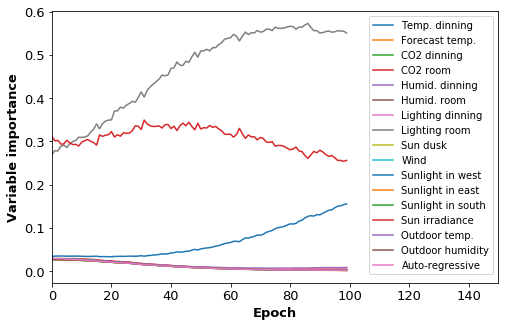

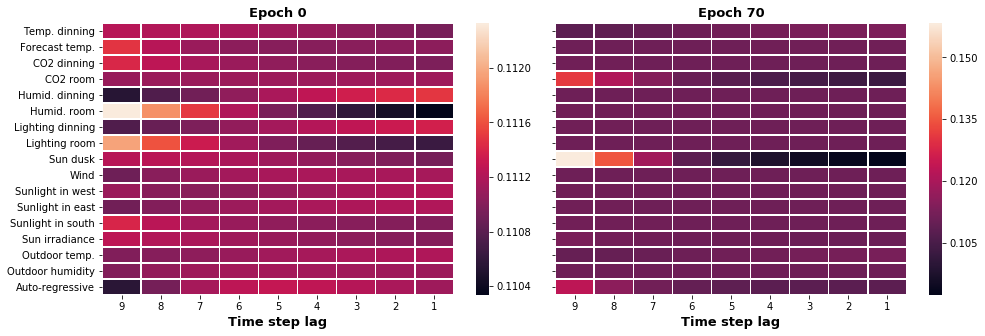

In [18]:
# gate type: full

file_path = "../../ts_results/error_plot2/ke_full_sml_01.00.001_.p"
#  "../../ts_results/sml/full/ke_fullsml_01.00.001_.p"

# --- variable impor

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

print('\n', sort_variable(file_path, full_cols))

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 150, None, ax, 10, 1)

# fig.savefig('../../ts_results/figure/full_var_sml.eps', bbox_inches='tight')



# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 70, ax[1], full_cols, False)

fig.subplots_adjust(wspace = 0.03, hspace = 0)

# fig.savefig('../../ts_results/figure/full_var_temp_sml.eps', bbox_inches='tight')



 [['Sunlight in west', 0.00036810213], ['Humid. room', 0.00037478426], ['Sun irradiance', 0.0003754444], ['Lighting dinning', 0.00037552495], ['Sunlight in east', 0.0003786013], ['Sunlight in south', 0.0003798508], ['Lighting room', 0.00038687847], ['Outdoor humidity', 0.00044800632], ['Auto-regressive', 0.00054883794], ['Outdoor temp.', 0.0006725594], ['CO2 room', 0.0028395017], ['Wind', 0.0028892704], ['Forecast temp.', 0.008181608], ['Humid. dinning', 0.059499666], ['Sun dusk', 0.1717205], ['CO2 dinning', 0.26628926], ['Temp. dinning', 0.48427156]]
(100, 17, 9)
(100, 17, 9)
(100, 17, 9)


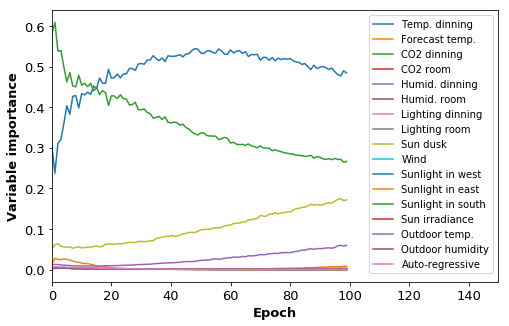

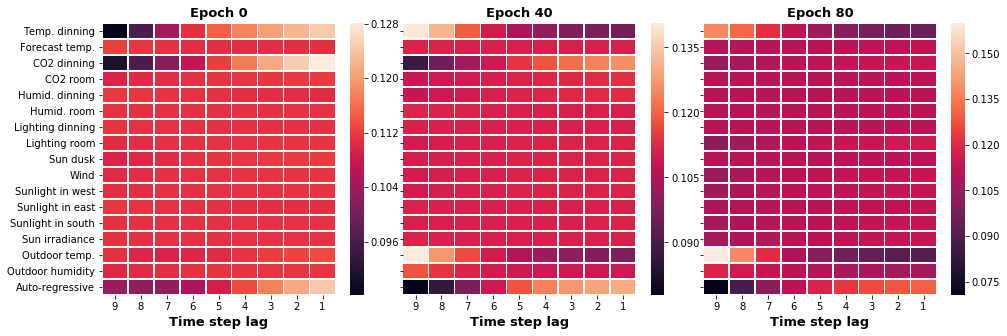

In [17]:
# gate type: tensor

# file_path = "../../ts_results/sml/tensor/ke_tensorsml_01.00.1_.p"

file_path = "../../ts_results/error_plot2/ke_tensor_sml_01.00.0001_.p"


# --- variable impor

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

print('\n', sort_variable(file_path, full_cols))

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 150, None, ax, 10, 1)

fig.savefig('../../ts_results/figure/tensor_var_sml.eps', bbox_inches='tight')


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 3, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 40, ax[1], full_cols, False)

plot_epoch_variable_temporal(file_path, 80, ax[2], full_cols, False)


fig.subplots_adjust(wspace = 0.03, hspace = 0)

# fig.savefig('../../ts_results/figure/tensor_var_temp_sml.eps', bbox_inches='tight')


('\n', [['Temp. dinning', 0.0035523477], ['Outdoor humidity', 0.0035651], ['Sun dusk', 0.0035682437], ['Wind', 0.0035831006], ['CO2 dinning', 0.0036218003], ['Lighting room', 0.003622217], ['Sunlight in east', 0.0036295932], ['Lighting dinning', 0.003634419], ['Sunlight in south', 0.0036435083], ['Humid. dinning', 0.0036568956], ['Forecast temp.', 0.0036686016], ['Humid. room', 0.003673922], ['Sunlight in west', 0.004442764], ['Outdoor temp.', 0.005353069], ['Auto-regressive', 0.011836543], ['Sun irradiance', 0.028850697], ['CO2 room', 0.9060972]])
(100, 17, 9)
(100, 17, 9)


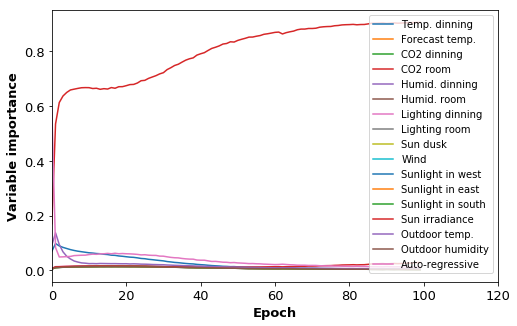

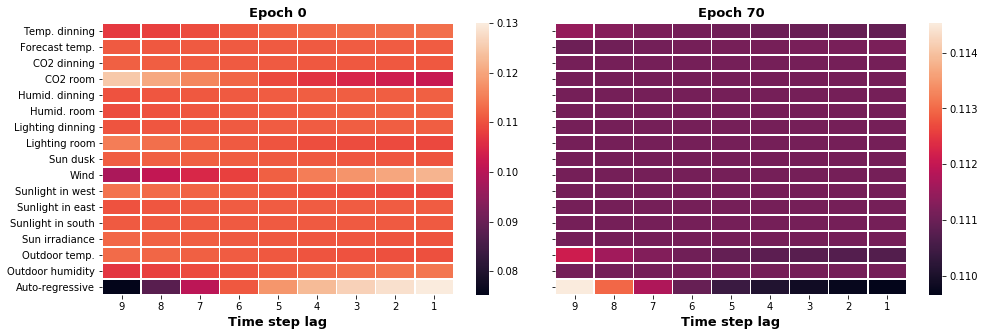

In [48]:
# gate type: full

file_path = "../../ts_results/error_plot/ke_tensor_sml_01.00.001_.p"
# file_path = "../../ts_results/sml/full/ke_sml_01.00.01_.p"

# --- variable impor

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

print('\n', sort_variable(file_path, full_cols))

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 10, 1)


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 70, ax[1], full_cols, False)

fig.subplots_adjust(wspace = 0.03, hspace = 0)


('\n', [['Temp. dinning', 0.0018351862], ['Auto-regressive', 0.0020151604], ['Outdoor humidity', 0.0020230662], ['Lighting room', 0.0020894152], ['CO2 room', 0.0020915281], ['Sunlight in east', 0.0020990577], ['Sunlight in south', 0.0021011753], ['Wind', 0.0021025236], ['Sun dusk', 0.0021043557], ['Humid. room', 0.0021199977], ['Sunlight in west', 0.0032441937], ['Outdoor temp.', 0.0033402583], ['CO2 dinning', 0.006137856], ['Forecast temp.', 0.07097803], ['Humid. dinning', 0.13464455], ['Lighting dinning', 0.22421622], ['Sun irradiance', 0.5368574]])
(80, 17, 9)
(80, 17, 9)


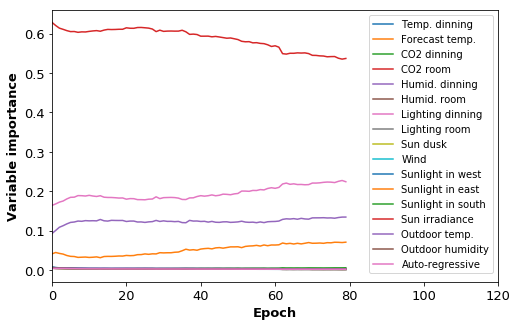

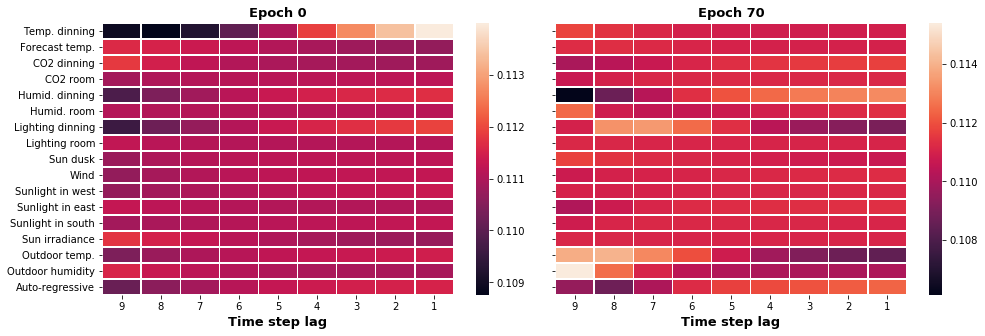

In [15]:
# gate type: tensor

file_path = "../../ts_results/sml/tensor/ke_sml_01.00.001_.p"

# --- variable impor

fig, ax = plt.subplots( ncols = 1, figsize=(8,5));

print('\n', sort_variable(file_path, full_cols))

# epoch-wise variable importance
plot_epoch_variable(file_path, full_cols, 120, None, ax, 10)


# --- epoch-wise variable temporal importance

fig, ax = plt.subplots( ncols = 2, figsize=(16,5));

plot_epoch_variable_temporal(file_path, 0, ax[0], full_cols, True)

plot_epoch_variable_temporal(file_path, 70, ax[1], full_cols, False)

fig.subplots_adjust(wspace = 0.03, hspace = 0)
